In [16]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.electronic_structure.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure.plotter import*
import matplotlib.pyplot as plt
import numpy as np

# Analyse de la structures de bandes électroniques du ZrCoBi

In [17]:
#téléchargement des fichiers
with MPRester("QhH6n7UMD6eoOToxuLav") as m:
    #structure for materials
    structure = m.get_bandstructure_by_material_id("mp-31451")

In [18]:
electro_band_plot = BSPlotter(structure) #récupération de toutes les données nécessaires

# 1) Bande Interdite

In [19]:
#récupération des infos de la bande gap
band_gap = structure.get_band_gap()
direct = "direct"
if(band_gap['direct'] == False):
    direct = "indirect"
print("La bande d'énergie est "+direct+", vaut "+str(band_gap['energy'])+" eV la de direction de vecteur k est "+str(band_gap['transition'])+" pour la transition.")
print("Le ZrCoBi est donc un semi-conducteur.")

La bande d'énergie est indirect, vaut 0.9774000000000003 eV la de direction de vecteur k est L-X pour la transition.
Le ZrCoBi est donc un semi-conducteur.


# 2) Direction de la dispersion maximale et minimale dans la bande de conduction et de valence

## 2.1) Récupération de la dernière bande de valence et de la première bande de conduction

Pour récupérer la dernière bande de valence et la première bande de conduction, on va récupérer celle qui a respectivement le plus haut "valence band maximum"(VBM) pour les bandes de valences, et celle qui a le plus bas "conduction band minimum" (CBM).

In [20]:
cbmlist = []
vbmlist = []
cbm = structure.get_cbm() #récupération des bandes de conduction maximales
vbm = structure.get_vbm() #récupération des bandes de valence maximales
cbm_band_index = cbm["band_index"].items()
vbm_band_index = vbm["band_index"].items()
for cursor in cbm_band_index:
    cbmlist.append(cursor[1][0])
for cursor in vbm_band_index:
    vbmlist.append(cursor[1][0])

#récuperation de la dernière bande de valence et la première bande de conduction
vbm = vbmlist[-1]
cbm = cbmlist[0]
print("La dernière bande de valence est la bande "+str(vbm)+".")
print("La dernière bande de conduction est la bande "+str(cbm)+".")

La dernière bande de valence est la bande 11.
La dernière bande de conduction est la bande 13.


## 2.2) Calcul des directions de dispersion maximale et minimale

La dispersion est définie comme la pente du graphe $\delta E/\delta k$. Pour déterminer les directions où la dispersion est maximale ou minimale, il suffit de calculer la variation de $E$ entre les différents points $k$ de la bande d'intérêt et de déterminer la zone ou celle-ci est la plus ou la moins élevée.

In [21]:
# Pour mettre la structure de bandes sur le graph

def dEdK(E,k): #calcul de la pente
    dEdK = (abs((E[-1]-E[0])))/(k[-1]-k[0])
    result = [E[-1],E[0],k[-1],k[0],dEdK]
    return(np.array(result))

data = electro_band_plot.bs_plot_data()
distance = data.get('ticks').get('distance')
distances = data.get('distances') #récupération des directions que peuvent prendre k
energy = data.get('energy') #energie associée aux différentes directions

pente_val = np.zeros((len(distances),5))
pente_cond = np.zeros((len(distances),5))
for i in range(len(distances)): #calcul des pentes associées aux différents vecteurs k
    pente_val[i] = dEdK(energy["1"][i][vbm],distances[i])
    pente_cond[i] = dEdK(energy["1"][i][cbm],distances[i])

finder_for_val = np.zeros(len(distances))
finder_for_cond = np.zeros(len(distances))

for j in range(len(distances)): #détermination de la pente la plus élevée
    finder_for_val[j] = pente_val[j][4]
    finder_for_cond[j] = pente_cond[j][4]

max_val = np.argmax(finder_for_val)
min_val = np.argmin(finder_for_val)
max_cond = np.argmax(finder_for_cond)
min_cond = np.argmin(finder_for_cond)

## 2.3) Graphique de la structure de bandes électroniques et des directions de dispersion maximum

La pente maximale (en jaune) pour la bande de valence vaut 1.2118262145057093.
La pente maximale (en orange) pour la bande de conduction vaut 1.6169916173553989.


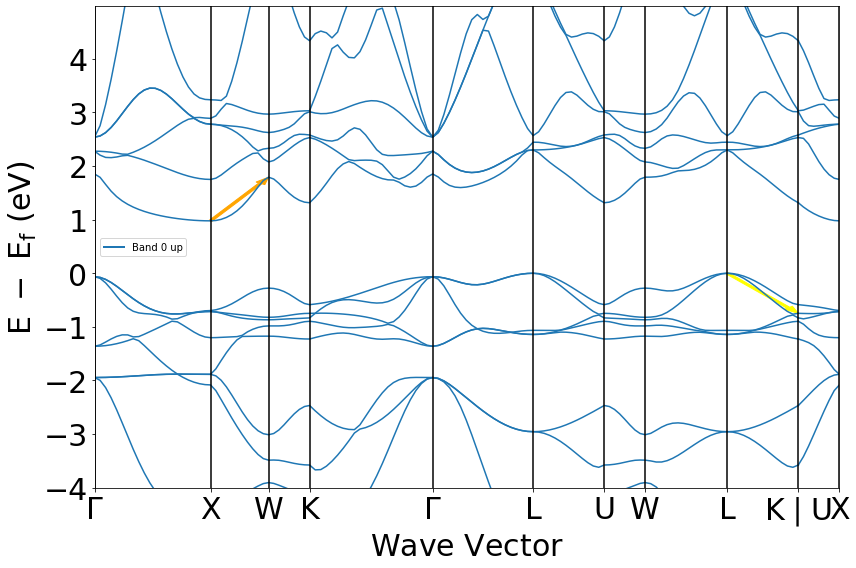

In [22]:
electro_band_plot.get_plot()
#recupération des données intéressantes pour le maximum
pente_val_max = pente_val[max_val] #récupération des données pour la pente max pour la bande de valence
#plot de la pente max en jaune
plt.arrow(pente_val_max[3],pente_val_max[1],pente_val_max[2]-pente_val_max[3],pente_val_max[0]-pente_val_max[1], color='yellow',width = 0.03,length_includes_head =True)

pente_cond_max = pente_cond[max_cond] #récupération des données pour la pente max pour la bande de conduction
#plot de la pente en orange
plt.arrow(pente_cond_max[3],pente_cond_max[1],pente_cond_max[2]-pente_cond_max[3],pente_cond_max[0]-pente_cond_max[1], color='orange',width = 0.03,length_includes_head = True)
print("La pente maximale (en jaune) pour la bande de valence vaut "+str(pente_val_max[4])+".")
print("La pente maximale (en orange) pour la bande de conduction vaut "+str(pente_cond_max[4])+".")

## 2.4) Graphique de la structure de bandes électroniques et des directions de dispersion minimum

La pente maximale (en jaune) pour la bande de valence vaut 0.07369992152160576.
La pente maximale (en orange) pour la bande de conduction vaut 0.5023691131788232.


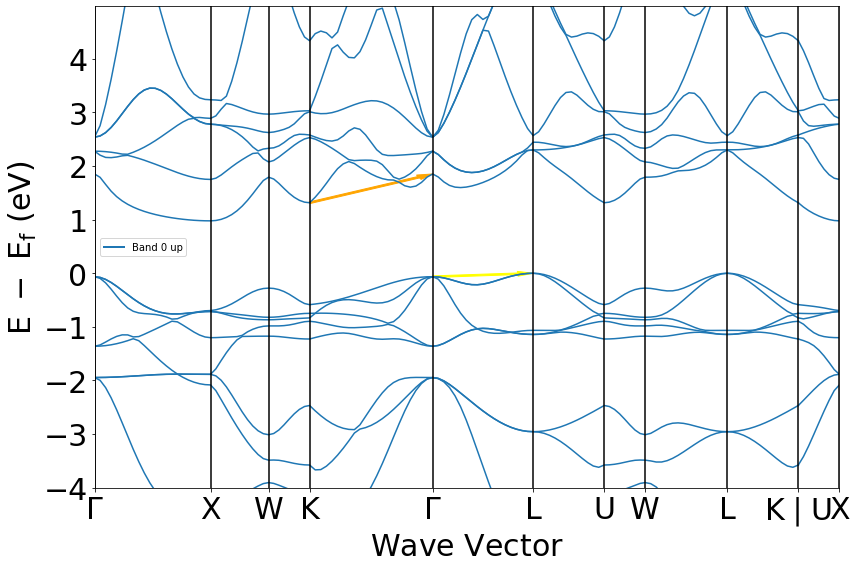

In [23]:
electro_band_plot.get_plot()
#recupération des données intéressantes pour le minimum
pente_val_min = pente_val[min_val]#récupération des données pour la pente min pour la bande de valence
#plot de la pente en jaune
plt.arrow(pente_val_min[3],pente_val_min[1],pente_val_min[2]-pente_val_min[3],pente_val_min[0]-pente_val_min[1], color='yellow',width = 0.03,length_includes_head =True)

pente_cond_min = pente_cond[min_cond]#récupération des données pour la pente min pour la bande de conduction
#plot de la pente en orange
plt.arrow(pente_cond_min[3],pente_cond_min[1],pente_cond_min[2]-pente_cond_min[3],pente_cond_min[0]-pente_cond_min[1], color='orange',width = 0.03,length_includes_head = True)
print("La pente maximale (en jaune) pour la bande de valence vaut "+str(pente_val_min[4])+".")
print("La pente maximale (en orange) pour la bande de conduction vaut "+str(pente_cond_min[4])+".")

# 3) Calcul de la masse effective pour la dernière bande de valence et la première bande de conduction

Pour le calcul de la masse effective, nous allons partir de la formule $m_{eff} = \hbar^2(\frac{\partial^2 E}{\partial k^2})^{-1}$ et considérer que la structure de la bande de valence peut être approximée par un polynôme du second ordre au alentours des positions d'intérêts. Après réarrangement, nous obtenons l'expression $E = \frac{\hbar^2 k^2}{2m_{eff}} + A k + B$. Ensuite, il suffira de prendre le premier coefficient de l'interpolation et isoler $m_{eff}$.

In [25]:
hbar = (6.62607015*10**(-34))/(2*np.pi) #[J]
eV = 1.602176634*10**(-19) #[J]
hbar_eV = hbar/eV #[eV]

#interpolation pour VBM
vbms = data.get('vbm')
kval = np.zeros(3)
kval[1] = vbms[0][0]
kval[0] = distances[4][-2]
kval[2] = distances[5][1]

Eval = np.zeros(3)
Eval[1] = vbms[0][1]
Eval[0] = energy.get('1')[4][11][-2]
Eval[2] = energy.get('1')[5][11][1]

interpolation_val = np.polyfit(kval,Eval,2) #interpolation avec 3 énergies
m_eff_val = (vbms[0][0])**2*(hbar_eV**2/(2*interpolation_val[0]))# isolement pour le calcul de la masse effective
print("Masse effective pour la bande de valence = "+str(m_eff_val)+" kg.")

#interpolation pour CBM
cbms = data.get('cbm')

kcond = np.zeros(3)
kcond[1] = cbms[0][0]
kcond[0] = distances[0][-2]
kcond[2] = distances[2][1]

Econd = np.zeros(3)
Econd[1] = vbms[0][1]
Econd[0] = energy.get('1')[0][13][-2]
Econd[2] = energy.get('1')[2][13][1]

interpolation_cond = np.polyfit(kcond,Econd,2) #interpolation avec 3 énergies
m_eff_cond = (cbms[0][0])**2*(hbar_eV**2/(2*interpolation_cond[0])) # isolement pour le calcul de la masse effective
print("Masse effective pour la bande de conduction = "+str(m_eff_cond)+" kg.")

Masse effective pour la bande de valence = -9.714078922438375e-31 kg.
Masse effective pour la bande de conduction = 5.5528785563857615e-33 kg.
